# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [58]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Import Stats 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [6]:
# Your code here:
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [16]:
# There are 1751 rows of data
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [22]:
# Your code here:
dates = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=1751)
freq = pd.infer_freq(dates)
dates

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [27]:
# Your code here:
sensor.index = dates
# Check
sensor.sample(5)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:28:19,1.874004,-0.564599,-2.786910,0.806267,0.535077,0.252244,0.548188,0.066865,0.374832,0.209419,-0.296551,-0.253297
2018-01-01 00:14:06,1.371730,-0.716011,-2.558297,0.739532,0.656380,-0.149192,0.997154,-1.173772,0.122207,0.120210,-0.360115,-0.087442
2018-01-01 00:03:13,1.358846,-0.912096,-2.474639,0.598393,0.790788,-0.128763,1.127166,-1.255962,0.555087,-0.081700,-0.254625,-0.255209
2018-01-01 00:27:39,1.294061,-0.505769,-2.607566,0.841518,0.484480,-0.239010,-0.422799,-1.818197,1.362833,-0.188900,-0.069075,0.237820
2018-01-01 00:14:02,1.458351,-0.726902,-2.520519,0.742518,0.664558,-0.083846,-0.196372,-1.049448,0.169258,0.191015,-0.221519,-0.233186


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [31]:
# Your code here:
result = seasonal_decompose(sensor['userAcceleration.x'], model="additive", period=60)

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

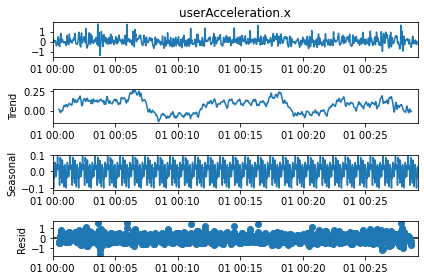

In [30]:
result.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

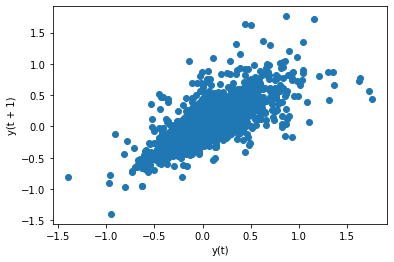

In [32]:
# Your code here:
pd.plotting.lag_plot(sensor['userAcceleration.x'])

Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

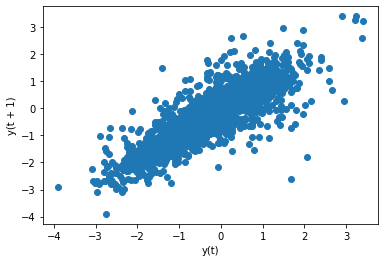

In [33]:
# Your code here:
pd.plotting.lag_plot(sensor['rotationRate.x'])


What are your conclusions from both visualizations?

In [34]:
# Both plots follow the same trend line 

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [42]:
# Your code here:
test1 = adfuller(sensor["userAcceleration.x"])
test1

(-17.95799408616975,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [43]:
pvalue = test1[1]
pvalue

2.823439483037483e-30

In [44]:
test2 = adfuller(sensor["rotationRate.x"])
test2

(-5.269860625086413,
 6.320230335912449e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

In [45]:
pvalue = test2[1]
pvalue

6.320230335912449e-06

What are your conclusions from this test?

In [46]:
# Your conclusions here:
# Test1 = Not REJECTED 
# Test2 = REJECTED 

## Bonus: Challenge 2

Finally, we'll create an ARIMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 0, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [50]:
order = (2, 0, 1)

In [51]:
# 0. Splitting into train & test
y_train = sensor["userAcceleration.x"][:-10]
y_test = sensor["userAcceleration.x"][-11:]

In [52]:
model = ARIMA(y_train, order=(2, 0, 1), freq="S")


/Users/samledeboer/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [53]:
# 2. Fit the model:
model_fit = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.14475D-01    |proj g|=  1.14724D-03

At iterate    5    f= -2.14475D-01    |proj g|=  1.29563D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   2.776D-08  -2.145D-01
  F = -0.21447520729623382     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [54]:
# 3. Predict: create y_pred:
y_pred = model_fit.predict(len(y_train), len(y_train)+10, typ='levels')
print(y_pred)

2018-01-01 00:29:01    0.173149
2018-01-01 00:29:02    0.142896
2018-01-01 00:29:03    0.100522
2018-01-01 00:29:04    0.070106
2018-01-01 00:29:05    0.056099
2018-01-01 00:29:06    0.053778
2018-01-01 00:29:07    0.056790
2018-01-01 00:29:08    0.060646
2018-01-01 00:29:09    0.063316
2018-01-01 00:29:10    0.064493
2018-01-01 00:29:11    0.064646
Freq: S, dtype: float64


In [56]:
len(y_pred)

11

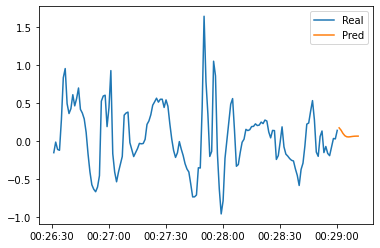

In [59]:
# 4. Visualize
plt.plot(y_train[-150:], label = "Real")
plt.plot(y_pred[-150:], label = "Pred")
plt.legend()

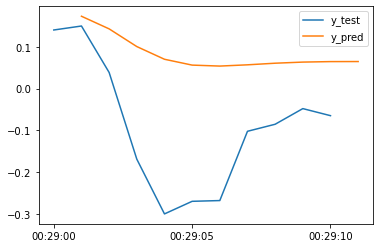

In [60]:
plt.plot(y_test, label = "y_test")
plt.plot(y_pred, label = "y_pred")
plt.legend();

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [61]:
# Your code here:
??